In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Reads in the "Coding Files" folder from Google Drive:
# 'Cross-National Data Collection/PAL Data and Coding/Coding Files'
from os import listdir
country_files = listdir('Coding Files')
country_files

['.DS_Store',
 '.ipynb_checkpoints',
 'Argentina.xlsx',
 'Belize.xlsx',
 'Bolivia.xlsx',
 'Brazil.xlsx',
 'Chile.xlsx',
 'Colombia.xlsx',
 'Costa Rica.xlsx',
 'Cuba.xlsx',
 'Dominican Republic.xlsx',
 'Ecuador.xlsx',
 'El Salvador.xlsx',
 'Guatemala.xlsx',
 'Guyana.xlsx',
 'Haiti.xlsx',
 'Honduras.xlsx',
 'Jamaica.xlsx',
 'Mexico.xlsx',
 'Nicaragua.xlsx',
 'Panama.xlsx',
 'Paraguay.xlsx',
 'Peru.xlsx',
 'Suriname.xlsx',
 'Template.xlsx',
 'Uruguay.xlsx',
 'Venezuela.xlsx']

In [21]:
# drop any ~${country}.xlsx files, '.DS_Store', and the Template.xlsx file
try:
    country_files.remove('Template.xlsx')
    country_files.remove('.DS_Store')
    country_files.remove('.ipynb_checkpoints')
except:
    print(country_files)

In [23]:
# merge into one dataframe
df = pd.DataFrame()

for i in country_files:
    data = pd.read_excel('Coding Files/' + i, 'police_force_level_variables')
    df = pd.concat([df, data])

In [25]:
df

,coder,country,ccode,year,police_org_id,police_org_name,police_org_name_source,antecedent,antecedent_source,year_start,...,police_military_joint,police_military_joint_source,civilians_killed_fy,civilians_killed_fy_source,police_killed_fy,police_killed_fy_source,police_courts,police_courts_source,police_oversight,police_oversight_source
0,Daniel,Argentina,160.0,1970.0,ARG_160_P1,Gendarmeria Nacional Argentina,source2,NaN,source51,1938.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Daniel,Argentina,160.0,1971.0,ARG_160_P1,Gendarmeria Nacional Argentina,source2,NaN,source51,1938.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Daniel,Argentina,160.0,1972.0,ARG_160_P1,Gendarmeria Nacional Argentina,source2,NaN,source51,1938.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Daniel,Argentina,160.0,1973.0,ARG_160_P1,Gendarmeria Nacional Argentina,source2,NaN,source51,1938.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Daniel,Argentina,160.0,1974.0,ARG_160_P1,Gendarmeria Nacional Argentina,source2,NaN,source51,1938.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,Daniel,Venezuela,101.0,2016.0,VEV_101_P31,Dirección General Sectorial de los Servicios d...,source1,Dirección General de la Policía (DIGEPOL),NaN,1969.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
504,Daniel,Venezuela,101.0,2017.0,VEV_101_P31,Dirección General Sectorial de los Servicios d...,source1,Dirección General de la Policía (DIGEPOL),NaN,1969.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
505,Daniel,Venezuela,101.0,2018.0,VEV_101_P31,Dirección General Sectorial de los Servicios d...,source1,Dirección General de la Policía (DIGEPOL),NaN,1969.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
506,Daniel,Venezuela,101.0,2019.0,VEV_101_P31,Dirección General Sectorial de los Servicios d...,source1,Dirección General de la Policía (DIGEPOL),NaN,1969.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Police size aggregated by country

# filter only data where police_size not null
df_police_size = df[df['police_size'].notnull() & (df['police_size'] != -999) & (df['police_size'] != 0) & ((df['police_jurisdiction'] == 1) | (df['police_jurisdiction'] == 2))]
#coerce police_size to numeric (a couple irregular entries)
df_police_size['police_size'] = pd.to_numeric(df_police_size['police_size'],  errors='coerce')

#group by country and year
size_country_year = df_police_size.groupby(['country', 'year'])['police_size'].sum().to_frame(name = 'police_size').reset_index()
size_country_year

C:\Users\gaoli\AppData\Local\Temp\ipykernel_26680\3995579686.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_police_size['police_size'] = pd.to_numeric(df_police_size['police_size'],  errors='coerce')


,country,year,police_size
0,Argentina,2001.0,38686.0
1,Argentina,2003.0,55104.0
2,Argentina,2004.0,55604.0
3,Argentina,2005.0,63404.0
4,Argentina,2006.0,68801.0
...,...,...,...
519,Venezuela,2012.0,8277.0
520,Venezuela,2013.0,18124.0
521,Venezuela,2014.0,22474.0
522,Venezuela,2015.0,25231.0


In [7]:
df_budget= df[df['police_budget'].notnull() & (df['police_budget'] != -999) & (df['police_budget'] != 0) & ((df['police_jurisdiction'] == 1) | (df['police_jurisdiction'] == 2))]
df_budget['police_budget'] = pd.to_numeric(df_budget['police_budget'],  errors='coerce')
budget_by_year = df_budget.groupby(['country', 'year'])['police_budget'].sum().to_frame(name = 'police_budget').reset_index()
budget_by_year

C:\Users\gaoli\AppData\Local\Temp\ipykernel_25576\3851185885.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_budget['police_budget'] = pd.to_numeric(df_budget['police_budget'],  errors='coerce')


,country,year,police_budget
0,Argentina,2001.0,1.228394e+09
1,Argentina,2003.0,1.450541e+09
2,Argentina,2004.0,1.787036e+09
3,Argentina,2005.0,2.017677e+09
4,Argentina,2006.0,2.469908e+09
...,...,...,...
405,Uruguay,2022.0,7.695876e+11
406,Uruguay,2023.0,5.655153e+11
407,Venezuela,2003.0,1.226968e+11
408,Venezuela,2004.0,1.566356e+11


In [8]:
country_codes = ['ARG', 'BLZ','BOL','CHL','COL','CRI','DOM','ECU','SLV','GTM',
    'GUY','HTI','HND','JAM','MEX','NIC','PRY','PER','SUR','URY','VEN']

In [9]:
import wbdata
import datetime

# Define the indicator (total population)
indicator = {'SP.POP.TOTL': 'Population', 'NY.GDP.MKTP.CD': 'GDP'}

# Fetch the data for a country's population from the World Bank
total_pop = wbdata.get_dataframe(indicator, country=country_codes, date=("1970", "2023"))
# Sort the data by year in increasing order
total_pop = total_pop.sort_values(by='date').reset_index()
total_pop['country'] = total_pop['country'].replace('Venezuela, RB', 'Venezuela')
total_pop['date'] = total_pop['date'].astype('float')
total_pop

,country,date,Population,GDP
0,Venezuela,1970.0,11355475.0,1.156111e+10
1,Costa Rica,1970.0,1855697.0,9.848302e+08
2,Nicaragua,1970.0,2444767.0,NaN
3,Argentina,1970.0,23842803.0,NaN
4,Uruguay,1970.0,2790265.0,2.137097e+09
...,...,...,...,...
1129,Bolivia,2023.0,12388571.0,4.584983e+10
1130,Jamaica,2023.0,2825544.0,1.942336e+10
1131,Venezuela,2023.0,28838499.0,NaN
1132,Haiti,2023.0,11724763.0,1.985083e+10


In [10]:
size_country_year["country"] = size_country_year["country"].replace("Colombia ", "Colombia")
size_country_year["country"] = size_country_year["country"].replace("Paraguay ", "Paraguay")

budget_by_year["country"] = budget_by_year["country"].replace("Colombia ", "Colombia")
budget_by_year["country"] = budget_by_year["country"].replace("Paraguay ", "Paraguay")

In [37]:
merged = size_country_year.merge(total_pop, how = "inner", left_on = ['country', 'year'], right_on = ['country', 'date'])
merged = merged.rename(columns={'Population': 'population'})
merged.drop(columns=['date'], inplace=True)

In [41]:
# Add a column that calculates police per capita
# police per capita = (number of police officers/total population)*100,000
merged['police_per_capita'] = np.round(merged['police_size'] / merged['population'] * 100000, 2)
merged['GDP_per_capita'] = np.round(merged['GDP'] / merged['population'], 2)
merged

,country,year,police_size,population,GDP,police_per_capita,GDP_per_capita
0,Argentina,2001.0,38686.0,37480493.0,2.686968e+11,103.22,7168.98
1,Argentina,2003.0,55104.0,38278164.0,1.275870e+11,143.96,3333.15
2,Argentina,2004.0,55604.0,38668796.0,1.646579e+11,143.80,4258.16
3,Argentina,2005.0,63404.0,39070501.0,1.987371e+11,162.28,5086.63
4,Argentina,2006.0,68801.0,39476851.0,2.325573e+11,174.28,5890.98
...,...,...,...,...,...,...,...
519,Venezuela,2012.0,8277.0,29470426.0,3.812862e+11,28.09,12937.93
520,Venezuela,2013.0,18124.0,29838021.0,3.710054e+11,60.74,12433.98
521,Venezuela,2014.0,22474.0,30193258.0,4.823593e+11,74.43,15975.73
522,Venezuela,2015.0,25231.0,30529716.0,NaN,82.64,NaN


In [13]:
merged_budget = budget_by_year.merge(total_pop[["country", "date", "GDP"]], left_on = ['country', 'year'], right_on = ['country', 'date'])
merged_budget.drop(columns=['date'], inplace=True)
merged_budget

,country,year,police_budget,GDP
0,Argentina,2001.0,1.228394e+09,2.686968e+11
1,Argentina,2003.0,1.450541e+09,1.275870e+11
2,Argentina,2004.0,1.787036e+09,1.646579e+11
3,Argentina,2005.0,2.017677e+09,1.987371e+11
4,Argentina,2006.0,2.469908e+09,2.325573e+11
...,...,...,...,...
405,Uruguay,2022.0,7.695876e+11,7.016468e+10
406,Uruguay,2023.0,5.655153e+11,7.724083e+10
407,Venezuela,2003.0,1.226968e+11,8.362063e+10
408,Venezuela,2004.0,1.566356e+11,1.124514e+11


In [43]:
comparable_countries = ["Argentina", "Belize", "Chile", "Colombia", "Costa Rica", "Dominican Republic", 
                        "Guatemala", "Guyana", "Haiti", "Honduras", "Nicaragua", "Peru", "Uruguay"]
comparable_police_size = merged[merged['country'].isin(comparable_countries)]
comparable_police_size.head()

,country,year,police_size,population,GDP,police_per_capita,GDP_per_capita
0,Argentina,2001.0,38686.0,37480493.0,2.686968e+11,103.22,7168.98
1,Argentina,2003.0,55104.0,38278164.0,1.275870e+11,143.96,3333.15
2,Argentina,2004.0,55604.0,38668796.0,1.646579e+11,143.80,4258.16
3,Argentina,2005.0,63404.0,39070501.0,1.987371e+11,162.28,5086.63
4,Argentina,2006.0,68801.0,39476851.0,2.325573e+11,174.28,5890.98


In [45]:
most_recent_data = comparable_police_size.loc[comparable_police_size.groupby('country')['year'].idxmax()].reset_index().drop("index", axis=1)
most_recent_data = most_recent_data.sort_values("police_per_capita", ascending=False)
most_recent_data.head()

,country,year,police_size,population,GDP,police_per_capita,GDP_per_capita
12,Uruguay,2023.0,30037.0,3423108.0,7.724083e+10,877.48,22564.53
1,Belize,2021.0,2539.0,400031.0,2.424575e+09,634.70,6060.97
7,Guyana,2019.0,4956.0,798753.0,5.173760e+09,620.47,6477.30
11,Peru,2022.0,131726.0,34049588.0,2.464888e+11,386.87,7239.11
2,Chile,2023.0,69399.0,19629590.0,3.355333e+11,353.54,17093.24


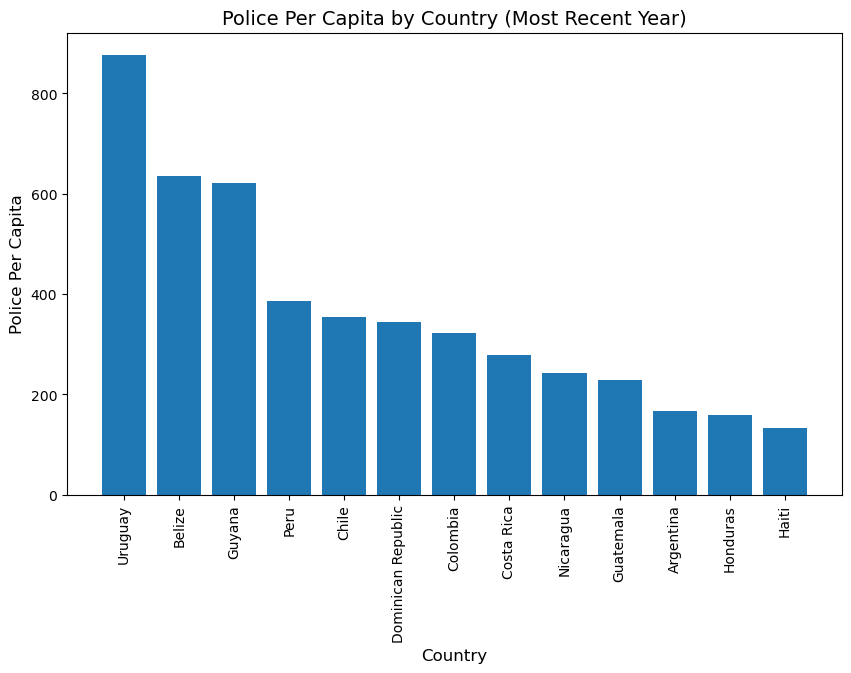

In [47]:
plt.figure(figsize=(10, 6))
plt.bar(most_recent_data['country'], most_recent_data['police_per_capita'])

plt.title('Police Per Capita by Country (Most Recent Year)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Police Per Capita', fontsize=12)
plt.xticks(rotation=90)

plt.show()

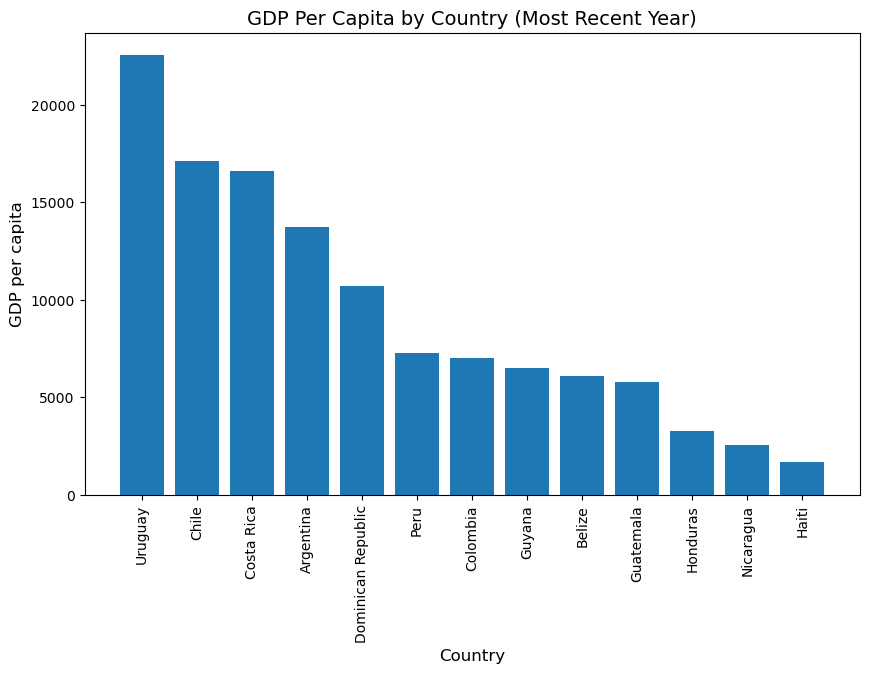

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(most_recent_data.sort_values("GDP_per_capita", ascending=False)['country'], most_recent_data.sort_values("GDP_per_capita", ascending=False)["GDP_per_capita"])

plt.title('GDP Per Capita by Country (Most Recent Year)', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP per capita', fontsize=12)
plt.xticks(rotation=90)

plt.show()

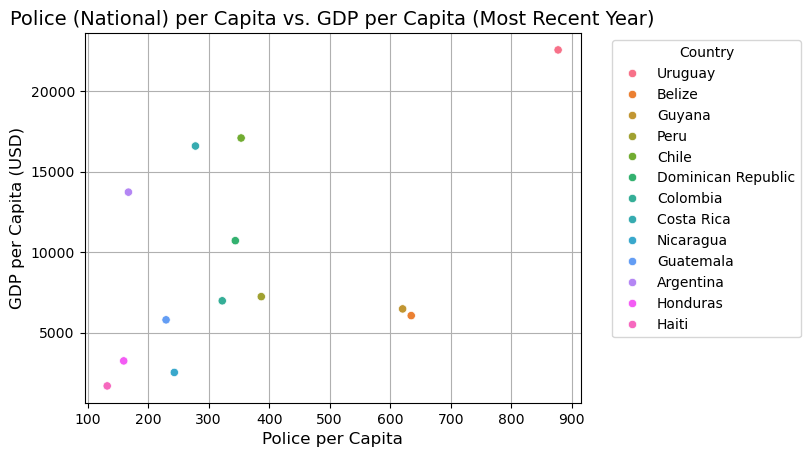

In [71]:
sns.scatterplot(data=most_recent_data, x='police_per_capita', y='GDP_per_capita', hue='country')

plt.title('Police (National) per Capita vs. GDP per Capita (Most Recent Year)', fontsize=14)
plt.xlabel('Police per Capita', fontsize=12)
plt.ylabel('GDP per Capita (USD)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

plt.show()

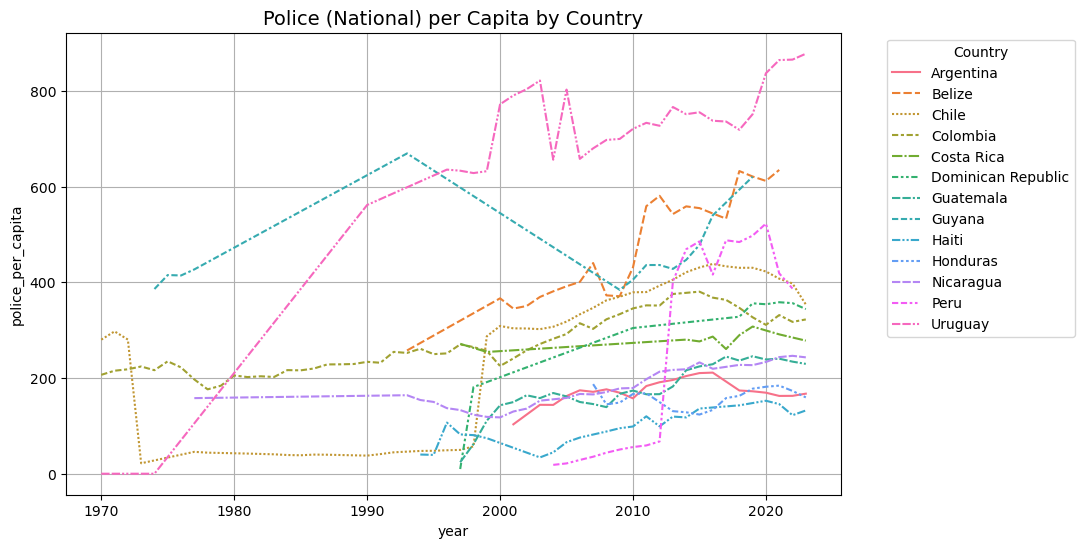

In [69]:
plt.figure(figsize=(10,6))
sns.lineplot(data=comparable_police_size, x='year', y='police_per_capita', hue='country', style='country')
plt.title('Police (National) per Capita by Country', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

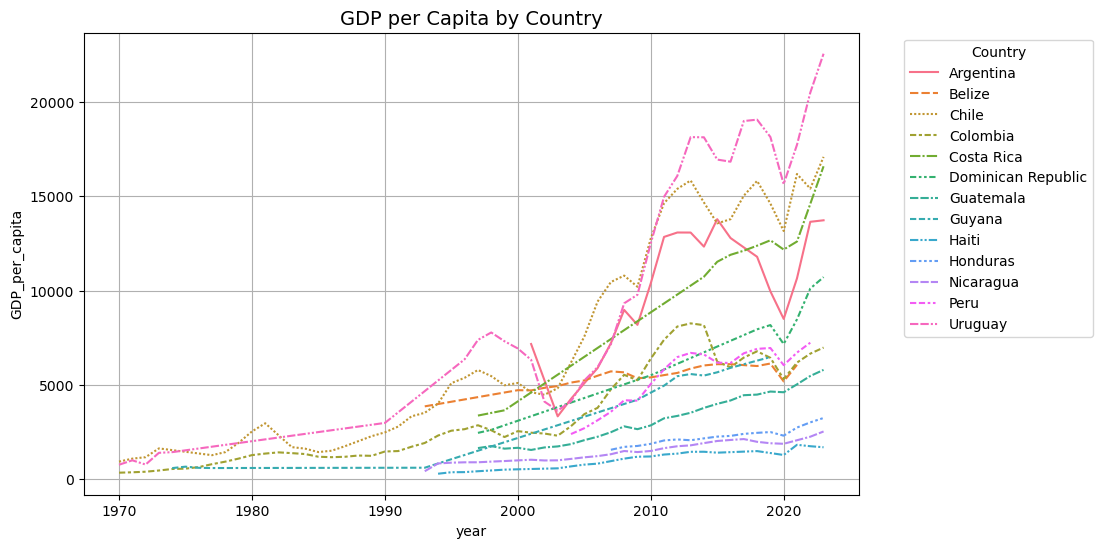

In [73]:
plt.figure(figsize=(10,6))
sns.lineplot(data=comparable_police_size, x='year', y='GDP_per_capita', hue='country', style='country')
plt.title('GDP per Capita by Country', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()